In [1]:
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import json
from itertools import product
import glob, os
import re
import matplotlib

In [2]:
with open('mdp_dict_chosen.txt', 'r') as file:
    mdp_dict = file.read()
mdp_dict = json.loads(mdp_dict)

def compare_target_behaviour(mdp_name, policy_folder = 'policies_penalised', policy_path = None):
    
    if policy_path is None:
        policy = pd.read_csv('{}/policy_{}.csv'.format(policy_folder, mdp_name))
    else:
        policy = pd.read_csv(policy_path)
    transitions = pd.read_csv('trans_ori/original_transitions_{}.csv'.format(mdp_name))

    # Deriving Behaviour Policy
    sa_count = transitions.groupby(['state','action']).sum()['support']
    s_count = transitions.groupby(['state']).sum()['support']
    observed_policy = sa_count/s_count
    observed_policy.rename('target_prob', inplace = True)
    observed_policy = pd.DataFrame(observed_policy)

    policy_mod = policy.merge(observed_policy, how = 'left', left_on=['state', 'policy'], right_index = True)
    observed_policy.reset_index(inplace = True)
    observed_policy.rename(columns = {'target_prob':'behaviour_prob','action':'behaviour_action'}, inplace = True)
    most_common_actions = observed_policy.sort_values(['state','behaviour_prob'], ascending = [True,False]).groupby('state').first()

    policy_mod = policy_mod.merge(most_common_actions, how = 'left', left_on = ['state'], right_index = True)
    policy_mod = policy_mod.merge(transitions.groupby('state').sum()['support'], how = 'left', left_on = 'state', right_index = True)
    policy_mod['support'] = policy_mod['support'].astype(int)
    policy_mod['state'] =  policy_mod['state'].astype(str)
    
    return policy_mod

def find_actions_with_rank(rank):
    actions = []
    for key in action_encoder.keys():
        if key[1] == rank:
            actions.append(action_encoder[key])
    return actions

def find_actions_with_part(part):
    actions = []
    for key in action_encoder.keys():
        if key[0] == part:
            actions.append(action_encoder[key])
    return actions


# 0 being lectures of each associated part
q_rank_space = [0,1,2,3,4]
part_space = range(1,8)

action_space = list(product(part_space, q_rank_space))

action_encoder = {j:i for i,j in enumerate(action_space)}

# Adding lectures from part 0 & -1
action_encoder[(0,0)] = len(action_encoder)
action_encoder[(-1,0)] = len(action_encoder)

### State & Action Distribution: PI policies

In [33]:
policy_folder = 'policies'
################################################################################

for mdp_name in mdp_dict.keys():
    print('*****************************************************************************************')
    print(mdp_name)
    
    policy_mod = compare_target_behaviour(mdp_name, policy_folder)

    if policy_mod['target_prob'].isna().sum() != 0:
        print('OOD Actions!!! Num in policy: {}'.format(policy_mod['target_prob'].isna().sum()))

    print('{}: Least probable actions in the target policy:'.format(mdp_name))
    display(policy_mod.nsmallest(10, 'target_prob'))

    print('{}: Lowest support actions in the target policy:'.format(mdp_name))
    policy_mod['PI_support'] = (policy_mod['target_prob'] * policy_mod['support'])
    display(policy_mod.nsmallest(10, 'PI_support'))

*****************************************************************************************
MDP_lp
MDP_lp: Least probable actions in the target policy:


,state,policy,values,target_prob,behaviour_action,behaviour_prob,support
53,422,35,227.454900,0.000005,23,0.167923,215360
57,432,35,233.293008,0.000018,24,0.159741,219819
37,322,35,227.454900,0.000021,23,0.167910,327776
48,411,35,236.052936,0.000031,23,0.135621,65211
36,321,30,233.046306,0.000039,23,0.164976,233561
32,311,35,236.052936,0.000041,22,0.152615,98758
20,221,35,233.046306,0.000042,24,0.173302,354451
54,423,35,223.947421,0.000044,23,0.148874,294524
41,332,35,233.293008,0.000057,24,0.164664,283104
21,222,35,227.454900,0.000063,22,0.166451,366108


MDP_lp: Lowest support actions in the target policy:


,state,policy,values,target_prob,behaviour_action,behaviour_prob,support,PI_support
53,422,35,227.454900,0.000005,23,0.167923,215360,1.0
48,411,35,236.052936,0.000031,23,0.135621,65211,2.0
32,311,35,236.052936,0.000041,22,0.152615,98758,4.0
57,432,35,233.293008,0.000018,24,0.159741,219819,4.0
37,322,35,227.454900,0.000021,23,0.167910,327776,7.0
36,321,30,233.046306,0.000039,23,0.164976,233561,9.0
33,312,35,225.760756,0.000076,22,0.160441,144888,11.0
34,313,35,221.016530,0.000088,22,0.144380,125544,11.0
56,431,34,235.079791,0.000084,24,0.140280,130311,11.0
54,423,35,223.947421,0.000044,23,0.148874,294524,13.0


*****************************************************************************************
MDP_aug4
MDP_aug4: Least probable actions in the target policy:


,state,policy,values,target_prob,behaviour_action,behaviour_prob,support
193,4114,35,157.377974,0.000016,23,0.137117,64485
131,3114,35,157.377974,0.000024,22,0.181779,81874
201,4214,25,180.549895,0.000059,23,0.159218,135525
195,4124,30,145.908143,0.000074,23,0.152603,80916
203,4224,30,168.448573,0.000080,23,0.169173,213734
69,2122,31,220.497310,0.000088,4,0.142184,33977
52,1421,0,304.782712,0.000099,24,0.472557,120705
197,4134,35,152.101948,0.000123,23,0.135134,106095
48,1411,18,297.952781,0.000132,24,0.473487,249270
124,2441,35,278.925761,0.000156,28,0.128927,6430


MDP_aug4: Lowest support actions in the target policy:


,state,policy,values,target_prob,behaviour_action,behaviour_prob,support,PI_support
88,2231,33,285.289286,0.000760,4,0.168821,1315,1.0
124,2441,35,278.925761,0.000156,28,0.128927,6430,1.0
145,3212,27,240.679604,0.000534,4,0.271513,1871,1.0
193,4114,35,157.377974,0.000016,23,0.137117,64485,1.0
210,4313,18,216.284156,0.000603,4,0.261158,1658,1.0
80,2211,18,295.905517,0.000233,4,0.180950,4294,1.0
120,2431,10,290.883959,0.001188,4,0.138955,842,1.0
129,3112,25,213.397721,0.000621,4,0.260870,1610,1.0
140,3141,17,286.625000,0.017857,28,0.178571,56,1.0
161,3312,12,246.521669,0.000654,4,0.261609,1529,1.0


*****************************************************************************************
MDP_aug46
OOD Actions!!! Num in policy: 1
MDP_aug46: Least probable actions in the target policy:


,state,policy,values,target_prob,behaviour_action,behaviour_prob,support
391,14118,15,390.405224,0.000007,24,0.433456,150336
1134,32146,33,260.069847,0.000018,23,0.164850,54128
1228,33146,33,270.869534,0.000019,24,0.166948,52681
662,22138,35,365.688502,0.000019,23,0.261655,52210
1136,32148,35,284.540161,0.000022,23,0.274841,44935
1563,44147,19,285.410439,0.000022,8,0.180742,44782
1509,43147,35,275.673119,0.000026,9,0.216331,38233
729,22343,35,214.104098,0.000027,24,0.159650,37457
1601,44445,35,396.000000,0.000027,24,0.140723,36881
668,22146,0,263.600963,0.000028,23,0.217178,36058


MDP_aug46: Lowest support actions in the target policy:


,state,policy,values,target_prob,behaviour_action,behaviour_prob,support,PI_support
55,11238,18,301.510625,0.000202,22,0.230287,4946,1.0
142,12127,18,391.139202,0.000040,24,0.189025,25129,1.0
263,13118,12,391.623893,0.000042,24,0.653157,23959,1.0
266,13123,2,396.020000,0.009346,13,0.168224,107,1.0
279,13138,19,370.382325,0.000296,24,0.251334,3374,1.0
283,13144,0,270.575287,0.000267,14,0.086759,3746,1.0
321,13312,3,399.000000,0.004016,24,0.313253,249,1.0
325,13316,17,391.114328,0.000306,24,0.607405,3268,1.0
327,13318,14,391.180850,0.000137,24,0.653978,7303,1.0
452,14315,15,392.040000,0.000288,24,0.402358,3477,1.0


*****************************************************************************************
MDP_aug468
OOD Actions!!! Num in policy: 3
MDP_aug468: Least probable actions in the target policy:


,state,policy,values,target_prob,behaviour_action,behaviour_prob,support
1162,141181,15,394.676676,0.000007,24,0.426962,146924
22,111181,10,390.192497,0.000013,24,0.420344,76868
3268,321461,10,393.030000,0.000028,23,0.159697,35605
1256,142181,18,393.079800,0.000028,24,0.395924,70713
12,111150,10,396.000000,0.000032,24,0.291491,31483
402,121171,0,393.059700,0.000034,24,0.333446,29633
1584,211361,19,393.675576,0.000035,22,0.165921,28839
4296,431471,35,372.192847,0.000035,8,0.217995,28597
13,111151,10,396.000000,0.000037,24,0.185110,26757
3271,321471,14,393.099700,0.000038,23,0.158435,26522


MDP_aug468: Lowest support actions in the target policy:


,state,policy,values,target_prob,behaviour_action,behaviour_prob,support,PI_support
12,111150,10,396.000000,0.000032,24,0.291491,31483,1.0
41,111262,14,389.621718,0.001285,36,0.465296,778,1.0
61,111351,15,389.675576,0.000179,4,0.108967,5598,1.0
160,112361,17,376.712107,0.000173,24,0.195949,5777,1.0
176,112432,30,309.704505,0.001460,36,0.690511,685,1.0
195,113120,15,393.059700,0.000570,24,0.512821,1755,1.0
196,113121,26,394.030000,0.001063,24,0.446334,941,1.0
231,113260,34,390.256824,0.000250,23,0.216379,3993,1.0
330,114270,3,387.325540,0.002551,22,0.165816,392,1.0
540,122351,0,363.354949,0.000127,23,0.103950,7898,1.0


*****************************************************************************************
MDP_aug4687
OOD Actions!!! Num in policy: 10
MDP_aug4687: Least probable actions in the target policy:


,state,policy,values,target_prob,behaviour_action,behaviour_prob,support
2365,1411811,15,395.010000,0.000007,24,0.426962,146924
229,1121801,10,389.614450,0.000013,24,0.427330,151754
3961,2213612,15,393.429197,0.000024,24,0.185354,41855
7296,3314612,34,386.258602,0.000033,24,0.161494,30354
230,1121811,10,389.614450,0.000033,24,0.406970,60228
226,1121701,10,389.614450,0.000037,24,0.376914,107250
8889,4234214,35,367.778895,0.000038,23,0.079668,26598
4146,2223612,19,383.325484,0.000039,24,0.199150,25890
6864,3224612,32,384.488598,0.000041,23,0.200984,24604
227,1121711,10,389.614450,0.000041,24,0.266478,73766


MDP_aug4687: Lowest support actions in the target policy:


,state,policy,values,target_prob,behaviour_action,behaviour_prob,support,PI_support
30,1111612,14,395.549950,0.000794,24,0.208896,1259,1.0
64,1112512,25,390.458100,0.000175,23,0.102882,5725,1.0
71,1112621,28,391.851477,0.003106,36,0.636646,322,1.0
115,1113602,17,387.440457,0.000166,24,0.233400,6024,1.0
167,1114522,15,393.069501,0.004854,36,0.694175,206,1.0
248,1122312,10,391.109103,0.002571,24,0.110540,389,1.0
263,1122521,18,392.779269,0.004184,36,0.301255,239,1.0
268,1122612,32,389.149301,0.000106,23,0.194979,9401,1.0
275,1122811,34,392.851477,0.000066,22,0.266583,15076,1.0
294,1123323,9,383.080831,0.005348,36,0.663102,187,1.0


### State & Action Distribution: CQL Policies

In [34]:
################################################################################
cql_csvs = glob.glob('policies_CQL/policy*')
mdp_name = 'MDP_aug4687'
for csv in cql_csvs:
    print('*****************************************************************************************')
    policy_name = re.sub(r'policies_CQL\\policy_',"", csv)
    policy_name = re.sub(r'.csv', '', policy_name)
    print(policy_name)
    policy_mod = compare_target_behaviour(mdp_name, policy_path = csv)
    if policy_mod['target_prob'].isna().sum() != 0:
        print('OOD Actions!!! Num in policy: {}'.format(policy_mod['target_prob'].isna().sum()))

*****************************************************************************************
bcq_q_qr_bndo
OOD Actions!!! Num in policy: 2454
*****************************************************************************************
lim_q_iqn
OOD Actions!!! Num in policy: 1994
*****************************************************************************************
lim_q_mean
OOD Actions!!! Num in policy: 1723
*****************************************************************************************
lim_q_qr
OOD Actions!!! Num in policy: 1868
*****************************************************************************************
lim_q_qr_bndo
OOD Actions!!! Num in policy: 2334
*****************************************************************************************
lim_q_qr_bndo_alph0.5
OOD Actions!!! Num in policy: 2358
*****************************************************************************************
lim_q_qr_bndo_alph0
OOD Actions!!! Num in policy: 5541
*************************

### State Val. Analysis

In [38]:
mdp_name = 'MDP_lp'
feat_to_incl = mdp_dict[mdp_name]
policy_mod = compare_target_behaviour(mdp_name, policy_folder='policies_penalised')

for i,feat in enumerate(feat_to_incl):
    
    corr = policy_mod['values'].corr(policy_mod['state'].str[i].astype(int))
    print('Correlation between state values and {} is {}'.format(feat, corr))
    

print('\nTop 5 states with highest val:')
top_n = policy_mod.nlargest(n = 5, columns = 'values')
bottom_n = policy_mod.nsmallest(n = 5, columns = 'values')
print(top_n[['state','values']])
print('\nTop 5 states with lowest val:')
print(bottom_n[['state','values']])

Correlation between state values and topic_fam is -0.004045120614535473
Correlation between state values and correct_so_far is 0.8168235181413387
Correlation between state values and av_time is -0.10132426459736985

Top 5 states with highest val:
   state      values
63   444  267.271722
47   344  264.417044
31   244  261.747569
15   144  261.386026
62   443  258.168685

Top 5 states with lowest val:
   state      values
19   214  216.716047
35   314  216.716047
51   414  216.716047
3    114  218.905098
39   324  220.991598


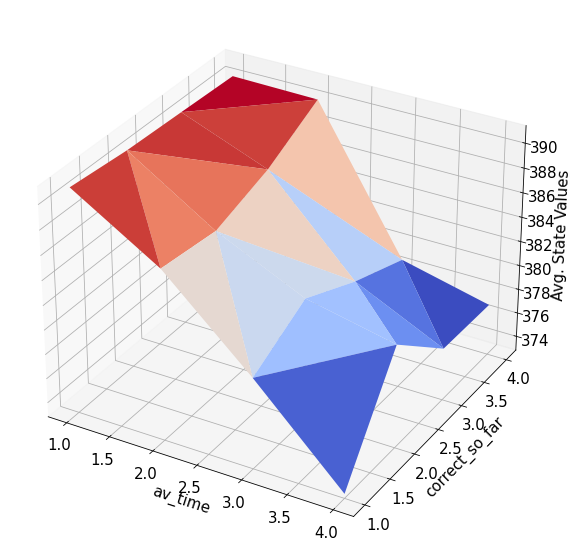

In [80]:
mdp_name = 'MDP_aug4687'
feat_to_incl = mdp_dict[mdp_name]
model_name = None


if model_name is not None:
    policy_path = os.path.join('policies_CQL', 'policy_{}.csv'.format(model_name))
else:
    policy_path = None
    
feat_to_incl = mdp_dict[mdp_name]
temp = compare_target_behaviour(mdp_name, policy_path=policy_path)

features_to_compare = ['av_time', 'correct_so_far']
feat_idx = [feat_to_incl.index(feat) for feat in features_to_compare]

for feat, idx in zip(features_to_compare, feat_idx):
    temp[feat] = temp['state'].str[idx].astype(int)

temp = temp.groupby(features_to_compare).mean()['values'].reset_index()
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10,10))
ax.plot_trisurf(temp[features_to_compare[0]], temp[features_to_compare[1]], temp['values'], cmap = 'coolwarm')
#plt.title('Avg. State values in feature space')
ax.set_xlabel(features_to_compare[0])
ax.set_ylabel(features_to_compare[1])
ax.set_zlabel('Avg. State Values')

if model_name is None:
    plt.savefig('Saved_Figs/values in feature space {}.pdf'.format(mdp_name))
else:
    plt.savefig('Saved_Figs/values in feature space {}.pdf'.format(model_name))
plt.show()
del temp

### Policy Analysis: Rank

In [70]:
mdp_name = 'MDP_aug4687'
feat_to_incl = mdp_dict[mdp_name]
policy_mod = compare_target_behaviour(mdp_name, policy_folder='policies_penalised')
temp = policy_mod.copy()
for idx, feat in enumerate(feat_to_incl):
    temp[feat] = temp['state'].str[idx].astype(int)
    
level_trends = pd.DataFrame()
for rank in q_rank_space:   
    states =  temp.loc[temp['policy'].isin(find_actions_with_rank(rank)),feat_to_incl]
    level_trends[rank] = states.mean()
    level_trends.loc['count', rank] = len(states)
    
level_trends = level_trends.transpose()
level_trends.index.rename('action_level', inplace = True)
print('At different action levels, the following are mean values of the features:')
display(level_trends)
del temp

At different action levels, the following are mean values of the features:


,topic_fam,correct_so_far,av_time,expl_received,ssl,prev_correct,av_fam,count
action_level,,,,,,,,
0,2.257752,2.255329,2.683624,3.281008,3.810078,0.790698,2.518895,2064.0
1,2.196078,2.296732,2.490196,3.032680,4.416993,0.930719,2.226144,765.0
2,2.110260,2.381317,2.498469,2.968606,4.594181,0.902757,2.218989,1306.0
3,2.163850,2.540376,2.465258,3.016432,4.489671,0.921127,2.307042,2130.0
4,2.260523,2.668942,2.478385,3.070250,4.336177,1.107224,2.319966,3516.0


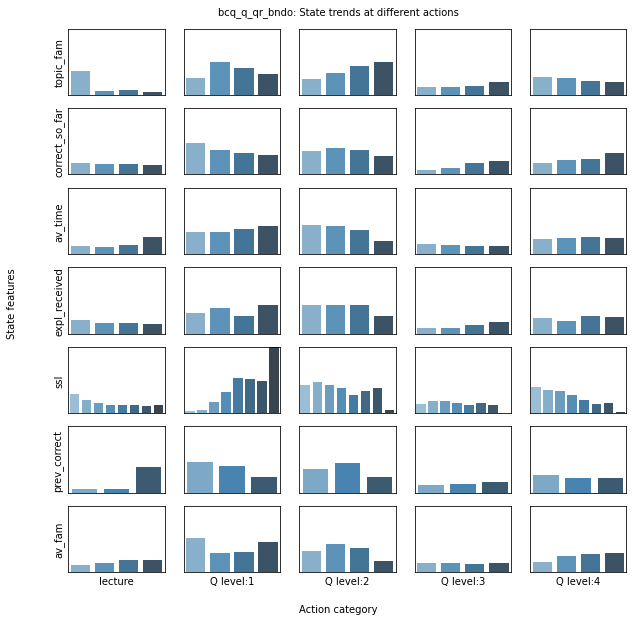

In [16]:
# mdp_name = 'MDP_aug4687'
# feat_to_incl = mdp_dict[mdp_name]
# model_name = 'bcq_q_qr_bndo'

# if model_name is not None:
#     policy_path = os.path.join('policies_CQL', 'policy_{}.csv'.format(model_name))
# else:
#     policy_path = None
    
# temp = compare_target_behaviour(mdp_name, policy_path=policy_path)

# for idx, feat in enumerate(feat_to_incl):
#     temp[feat] = temp['state'].str[idx].astype(int)

# fig, axes = plt.subplots(len(feat_to_incl), len(q_rank_space), figsize = (10,10))

# for j, rank in enumerate(q_rank_space):   
#     states =  temp.loc[temp['policy'].isin(find_actions_with_rank(rank)),feat_to_incl]
#     for i, state in enumerate(states.columns):
#         if len(states) != 0:
#             global_state_count = temp[state].value_counts()
#             local_state_count = states[state].value_counts()
#             y = (local_state_count/global_state_count).fillna(0)
#             x = y.index
#             sns.barplot(x = x,y = y, ax= axes[i,j], palette = "Blues_d")
#         if j == 0:
#             axes[i,j].set_ylabel(state)
#         else:
#             axes[i,j].set_ylabel(None)
                                 
#         if i == (len(feat_to_incl) - 1):
#             if rank == 0:
#                 axes[i,j].set_xlabel('lecture')
#             else:
#                 axes[i,j].set_xlabel('Q level:{}'.format(rank))
#         else:
#             axes[i,j].set_xlabel(None)

            
# custom_ylim = (0, 0.8)
# plt.setp(axes, ylim=custom_ylim)
# plt.setp(axes, xticks = [], yticks =[])
# fig.text(0.5, 0.07, 'Action category', ha='center')
# fig.text(0.04, 0.5, 'State features', va='center', rotation='vertical')
# if model_name is None:
#     fig.text(0.5, 0.9, '{}: State trends at different actions'.format(mdp_name), ha='center')
#     plt.savefig('Saved_Figs/State policy trend {}.pdf'.format(mdp_name))
# else:
#     fig.text(0.5, 0.9, '{}: State trends at different actions'.format(model_name), ha='center')
#     plt.savefig('Saved_Figs/State policy trend {}.pdf'.format(model_name)) 
# plt.show()
# del temp 

In [11]:
results_encoder = {
    'lim_q_mean':'CQL_0',
    'lim_q_qr':'CQL_1',
    'lim_q_iqn':'CQL_2',
    'lim_q_qr_do':'CQL_3',
    'lim_q_qr_bndo':'CQL_4',
    'lim_q_qr_bndo_alph0.5':'CQL_5',
    'lim_q_qr_bndo_alph0':'CQL_6',
    'lim_q_qr_bndo_alph5':'CQL_7',
    'bcq_q_qr_bndo':'BCQ_0'
}

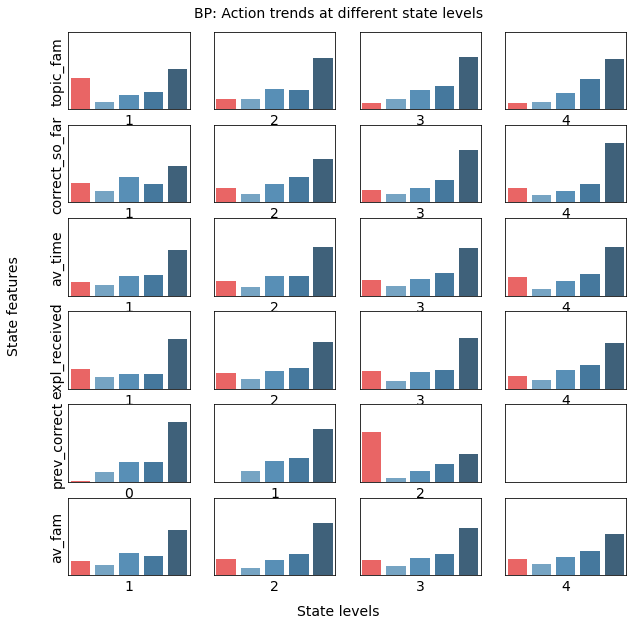

In [30]:
mdp_name = 'MDP_aug4687'
feat_to_incl = mdp_dict[mdp_name].copy()
model_name = None
behaviour_policy = True
matplotlib.rcParams.update({'font.size': 14})

if model_name is not None:
    policy_path = os.path.join('policies_CQL', 'policy_{}.csv'.format(model_name))
else:
    policy_path = None
    
temp = compare_target_behaviour(mdp_name, policy_path=policy_path)

for i, feat in enumerate(feat_to_incl):
    temp[feat] = temp['state'].str[i].astype(int)

if behaviour_policy:
    temp['rank'] = temp['behaviour_action'].apply(lambda x: list(action_encoder.keys())[x][1])
else:
    temp['rank'] = temp['policy'].apply(lambda x: list(action_encoder.keys())[x][1])

feat_to_incl.remove('ssl') # Remove SSL since its levels are less interpretable
max_bins = 4
fig, axes = plt.subplots(len(feat_to_incl), max_bins, figsize = (10,10))

custom_pallete = sns.color_palette('Blues_d')
custom_pallete[0] = (1,0.31,0.31)

for i, feat in enumerate(feat_to_incl): 
    unique_bins = np.sort(temp[feat].unique())
    for j, state_bin in enumerate(unique_bins):
        temp_i = temp[temp[feat] == state_bin]
        if len(temp_i) != 0:
            df = pd.DataFrame(index = range(5), columns = ['levels'])
            y = temp_i['rank'].value_counts()
            df['levels'] = y/y.sum()
            x = df.index
            sns.barplot(x = x,y = df['levels'], ax= axes[i,j], palette = custom_pallete)
        axes[i,j].set_xlabel(state_bin)
        if j == 0:
            axes[i,j].set_ylabel(feat)
        else:
            axes[i,j].set_ylabel(None)
            
custom_ylim = (0, 0.7)
plt.setp(axes, ylim=custom_ylim)
plt.setp(axes, xticks = [], yticks =[])
fig.text(0.5, 0.07, 'State levels', ha='center')
fig.text(0.04, 0.5, 'State features', va='center', rotation='vertical')
if model_name is not None:
    model_name = results_encoder[model_name]
    fig.text(0.5, 0.9, '{}: Action trends at different state levels'.format(model_name), ha='center')
    plt.savefig('Saved_Figs/Action trends at levels {}.pdf'.format(model_name))
elif behaviour_policy:
    fig.text(0.5, 0.9, '{}: Action trends at different state levels'.format('BP'), ha='center')
    plt.savefig('Saved_Figs/Action trends at levels {}.pdf'.format('BP'))
else:
    fig.text(0.5, 0.9, '{}: Action trends at different state levels'.format(mdp_name), ha='center')
    plt.savefig('Saved_Figs/Action trends at levels {}.pdf'.format(mdp_name))
plt.show()

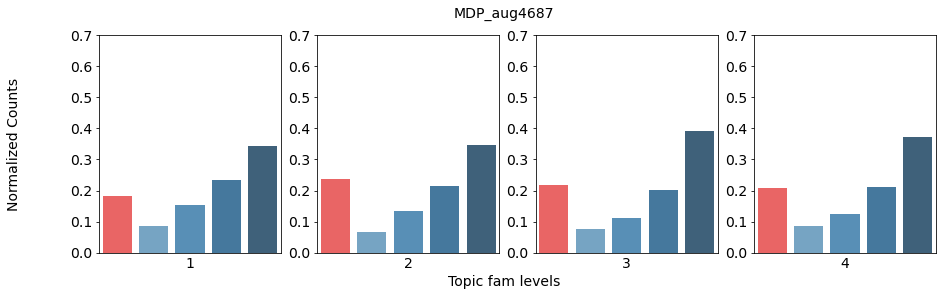

In [9]:
mdp_name = 'MDP_aug4687'
feat_to_incl = mdp_dict[mdp_name].copy()
model_name = None
matplotlib.rcParams.update({'font.size': 14})

if model_name is not None:
    policy_path = os.path.join('policies_CQL', 'policy_{}.csv'.format(model_name))
else:
    policy_path = None
    
temp = compare_target_behaviour(mdp_name, policy_path=policy_path)

for i, feat in enumerate(feat_to_incl):
    temp[feat] = temp['state'].str[i].astype(int)


temp['rank'] = temp['policy'].apply(lambda x: list(action_encoder.keys())[x][1])

feat_to_incl = ['topic_fam']
max_bins = 4
fig, axes = plt.subplots(len(feat_to_incl), max_bins, figsize = (15,4))

custom_pallete = sns.color_palette('Blues_d')
custom_pallete[0] = (1,0.31,0.31)

for i, feat in enumerate(feat_to_incl): 
    unique_bins = np.sort(temp[feat].unique())
    for j, state_bin in enumerate(unique_bins):
        temp_i = temp[temp[feat] == state_bin]
        if len(temp_i) != 0:
            df = pd.DataFrame(index = range(5), columns = ['levels'])
            y = temp_i['rank'].value_counts()
            df['levels'] = y/y.sum()
            x = df.index
            sns.barplot(x = x,y = df['levels'], ax= axes[j], palette = custom_pallete)
        axes[j].set_xlabel(state_bin)
        axes[j].set_ylabel(None)
        
            
custom_ylim = (0, 0.7)
plt.setp(axes, ylim=custom_ylim)
plt.setp(axes, xticks =[])
fig.text(0.5, 0.01, 'Topic fam levels', ha='center')
fig.text(0.04, 0.5, 'Normalized Counts', va='center', rotation='vertical')
if model_name is None:
    fig.text(0.5, 0.94, mdp_name, ha='center')
    plt.savefig('Saved_Figs/Action trends topic_fam {}.pdf'.format(mdp_name))
else:
    model_name = 'CQL_1'
    fig.text(0.5, 0.94, model_name, ha='center')
    plt.savefig('Saved_Figs/Action trends topic_fam {}.pdf'.format(model_name))
plt.show()

## Policy Analysis : Part

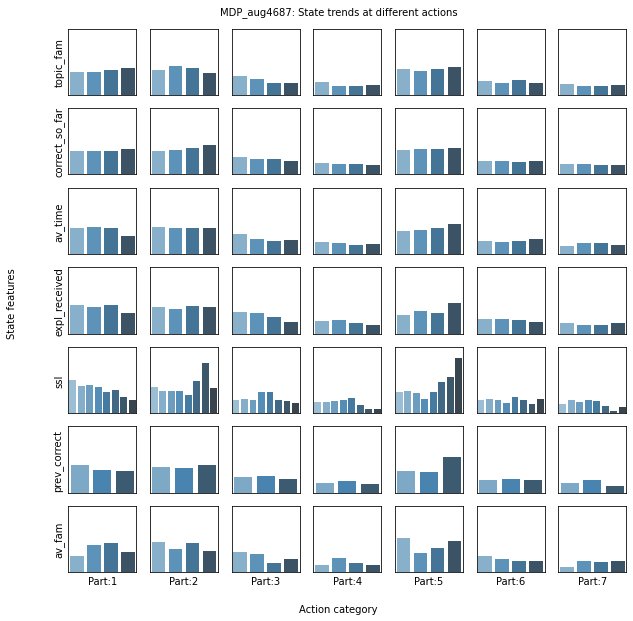

In [7]:
mdp_name = 'MDP_aug4687'
feat_to_incl = mdp_dict[mdp_name]
model_name = None

if model_name is not None:
    policy_path = os.path.join('policies_CQL', 'policy_{}.csv'.format(model_name))
else:
    policy_path = None
    
temp = compare_target_behaviour(mdp_name, policy_path=policy_path)

for idx, feat in enumerate(feat_to_incl):
    temp[feat] = temp['state'].str[idx].astype(int)

fig, axes = plt.subplots(len(feat_to_incl), len(part_space), figsize = (10,10))
custom_ylim = (0, 0.5)
plt.setp(axes, ylim=custom_ylim)

for j, part in enumerate(part_space):   
    states =  temp.loc[temp['policy'].isin(find_actions_with_part(part)),feat_to_incl]
    for i, state in enumerate(states.columns):
        if len(states) != 0:
            global_state_count = temp[state].value_counts()
            local_state_count = states[state].value_counts()
            y = (local_state_count/global_state_count).fillna(0)
            x = y.index
            sns.barplot(x = x,y = y, ax= axes[i,j], palette = "Blues_d")
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
        if j == 0:
            axes[i,j].set_ylabel(state)
        else:
            axes[i,j].set_ylabel(None)
                                 
        if i == (len(feat_to_incl) - 1):
            axes[i,j].set_xlabel('Part:{}'.format(part))
        else:
            axes[i,j].set_xlabel(None)

            
fig.text(0.5, 0.07, 'Action category', ha='center')
fig.text(0.04, 0.5, 'State features', va='center', rotation='vertical')
if model_name is None:
    fig.text(0.5, 0.9, '{}: State trends at different actions'.format(mdp_name), ha='center')
    plt.savefig('Saved_Figs/State policy part trend {}.pdf'.format(mdp_name))
else:
    fig.text(0.5, 0.9, '{}: State trends at different actions'.format(model_name), ha='center')
    plt.savefig('Saved_Figs/State policy part trend {}.pdf'.format(model_name)) 
plt.show()
del temp 

In [19]:
part_trends = pd.DataFrame()

for part in range(-1,8):   
    states =  policy.loc[policy['PI_policy'].isin(find_actions_with_part(part)), feat_to_incl]
    part_trends[part] = states.mean()
    part_trends.loc['count', part] = len(states)
    
part_trends = part_trends.transpose()
part_trends.index.rename('action_part', inplace = True)
print('For different action parts, the following are mean values of the features:')
part_trends

For different action parts, the following are mean values of the features:


,topic_fam,correct_so_far,av_time,slow_answer,count
action_part,,,,,
-1,4.000000,1.333333,2.333333,0.666667,3.0
0,3.071429,1.785714,2.785714,0.476190,42.0
1,2.135135,3.270270,3.243243,0.432432,37.0
2,1.700000,2.400000,1.950000,0.500000,20.0
3,3.000000,1.000000,1.000000,1.000000,1.0
4,3.666667,1.666667,1.000000,1.000000,3.0
5,NaN,NaN,NaN,NaN,0.0
6,3.000000,2.000000,1.000000,1.000000,2.0
7,2.300000,3.100000,1.550000,0.500000,20.0
